# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_results_df = pd.merge(study_results , mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_mouse_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
number_mice = combined_mouse_results_df["Mouse ID"].nunique()
number_mice

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_mouse_results_df[combined_mouse_results_df.duplicated(subset=["Mouse ID" , "Timepoint"] , keep=False)]["Mouse ID"].unique()


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_mouse_results_df = combined_mouse_results_df[~combined_mouse_results_df["Mouse ID"].isin(duplicates)]
clean_combined_mouse_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice = clean_combined_mouse_results_df["Mouse ID"].nunique()
clean_number_mice

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#grouping data by Drug Regimen
grouped_data = clean_combined_mouse_results_df.groupby("Drug Regimen")
#mean
Mean = grouped_data["Tumor Volume (mm3)"].mean()
#median
Median = grouped_data["Tumor Volume (mm3)"].median()
#Variance
Variance = grouped_data["Tumor Volume (mm3)"].var()
# Standard Deviation
Std = grouped_data["Tumor Volume (mm3)"].std()
#sem
Sem = grouped_data["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume" : Mean , 
                                   "Median Tumor Volume" : Median , 
                                   "Tumor Volume Variance" : Variance , 
                                   "Tumor Volume Std. Dev." : Std , 
                                   "Tumor Volume Std. Err." : Sem
})

print(summary_statistics)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_combined_mouse_results_df.groupby("Drug Regimen").agg(
    mean_tumor_volume = ("Tumor Volume (mm3)" , "mean") , 
    median_tumor_volume = ("Tumor Volume (mm3)" , "mean") ,
    tumor_volume_variance = ("Tumor Volume (mm3)" , "var") , 
    tumor_volume_std_dev = ("Tumor Volume (mm3)" , "std") ,
    tumor_volumr_std_err = ("Tumor Volume (mm3)" , lambda x: st.sem(x))
).reset_index()
print(summary_statistics)

  Drug Regimen  mean_tumor_volume  median_tumor_volume  tumor_volume_variance  \
0    Capomulin          40.675741            40.675741              24.947764   
1     Ceftamin          52.591172            52.591172              39.290177   
2    Infubinol          52.884795            52.884795              43.128684   
3     Ketapril          55.235638            55.235638              68.553577   
4     Naftisol          54.331565            54.331565              66.173479   
5      Placebo          54.033581            54.033581              61.168083   
6     Propriva          52.320930            52.320930              43.852013   
7     Ramicane          40.216745            40.216745              23.486704   
8     Stelasyn          54.233149            54.233149              59.450562   
9    Zoniferol          53.236507            53.236507              48.533355   

   tumor_volume_std_dev  tumor_volumr_std_err  
0              4.994774              0.329346  
1           

## Bar and Pie Charts

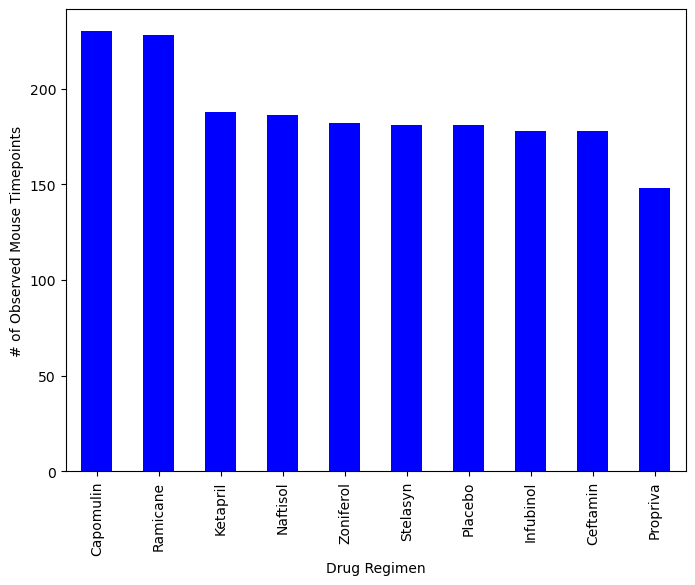

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regim_count = clean_combined_mouse_results_df["Drug Regimen"].value_counts()
drug_regim_count.plot(kind="bar" , figsize=(8,6) , color = "blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

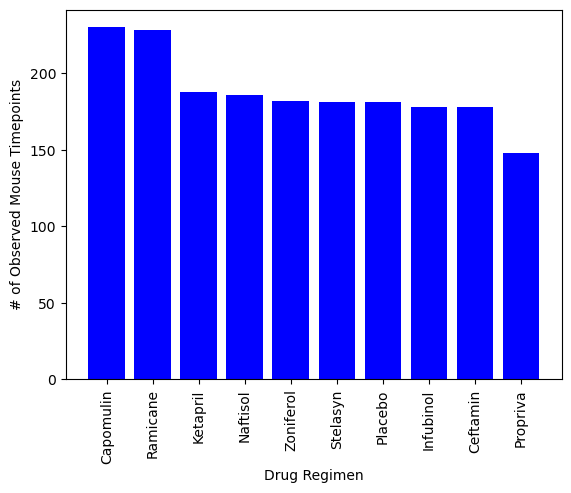

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regim_count.index , drug_regim_count.values , color = "Blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

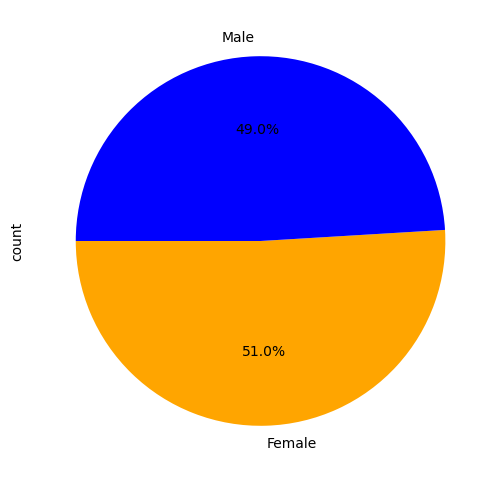

In [40]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = clean_combined_mouse_results_df["Sex"].value_counts()

# Make the pie chart
gender.plot(kind= "pie" , autopct = "%1.1f%%" , startangle= 180 , figsize = (6 , 6) , colors = ["orange" , "blue"] , labels = ["Female" , "Male"])
plt.show()

([<matplotlib.patches.Wedge at 0x21e015e5870>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

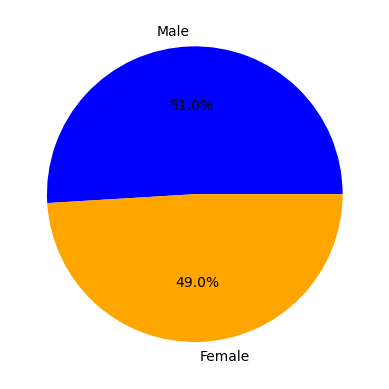

In [47]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_count = clean_combined_mouse_results_df["Sex"].value_counts()

# Make the pie chart
lables = gender_count.index
sizes = gender_count.values
colors = ["blue" , "orange"]

plt.pie(sizes , labels = lables , colors= colors , autopct= "%1.1f%%" , startangle = 0)

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_combined_mouse_results_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_last = last_timepoint.merge(clean_combined_mouse_results_df , on= ["Mouse ID" , "Timepoint"])

In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin" , "Ramicane" , "Infubinol" , "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = tumor_last[tumor_last["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    # add subset
    tumor_data.append(tumor_volumes)
    quartiles = tumor_volumes.quantile([0.25 , 0.5 , 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound) ]
    #stating Outliers
    if outliers.empty:
        print(f"{treatment} 's potential outliers: Series([] , Name: Tumor Volume (mm3) , dtype: float64)")
    else:
        print(f"{treatment} 's potential outliers: {outliers}")

Capomulin 's potential outliers: Series([] , Name: Tumor Volume (mm3) , dtype: float64)
Ramicane 's potential outliers: Series([] , Name: Tumor Volume (mm3) , dtype: float64)
Infubinol 's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin 's potential outliers: Series([] , Name: Tumor Volume (mm3) , dtype: float64)


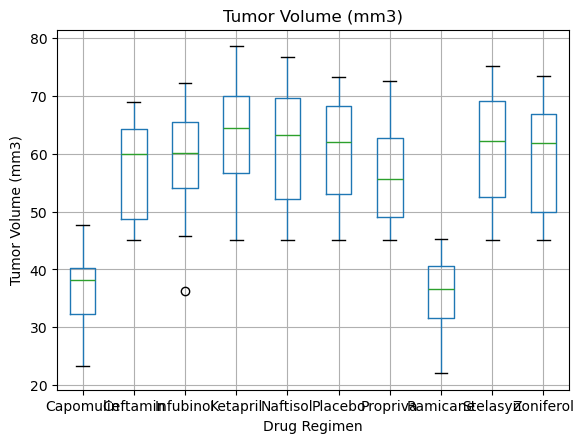

<Figure size 1000x600 with 0 Axes>

In [56]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_last.boxplot(column = "Tumor Volume (mm3)" , by = "Drug Regimen")
plt.xlabel("Drug Regimen")
plt.suptitle("")
plt.ylabel("Tumor Volume (mm3)")
plt.figure(figsize=(10 , 6))
plt.tight_layout()
plt.show()

## Line and Scatter Plots

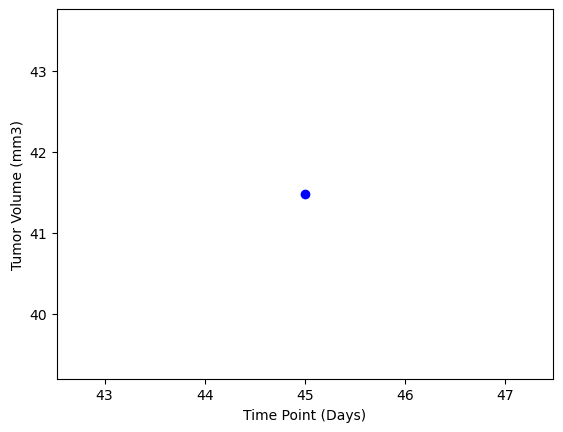

In [65]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
capomulin = tumor_last[(tumor_last["Mouse ID"] == mouse_id) & (tumor_last["Drug Regimen"] == "Capomulin")]
plt.plot(capomulin['Timepoint'], capomulin['Tumor Volume (mm3)'], marker='o', color='b')
plt.xlabel("Time Point (Days)")
plt.ylabel ("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Average Tumor Volume')

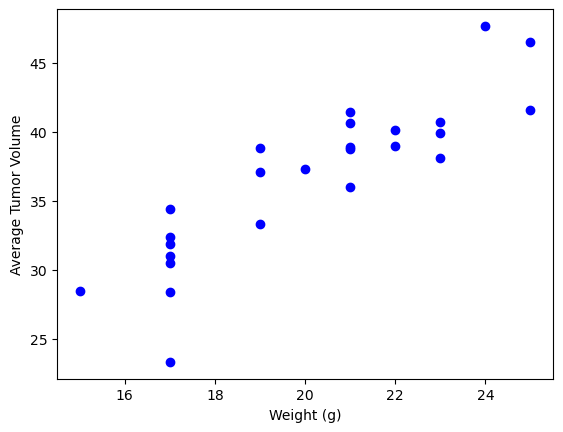

In [72]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = tumor_last[tumor_last["Drug Regimen"] == "Capomulin"]
avg_tumor = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
mouse_weight = mouse_metadata[['Mouse ID', 'Weight (g)']]
merged_data = pd.merge(avg_tumor, mouse_weight, on='Mouse ID')
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', marker='o')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")

## Correlation and Regression

In [75]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = np.corrcoef(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])[0, 1]
print(f"Correlation Coefficient: {correlation:.2f}")


Correlation Coefficient: 0.88
